In [1]:
# ## load data
# original_data = pd.read_csv("/kaggle/input/original-creditrisk/credit_risk_dataset.csv")
# df_train0 = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv').drop('id', axis=1)
# df_train = pd.concat([df_train0, original_data])

# ## split features 
# X = df_train.iloc[:, 0:10]
# y = df_train.iloc[:, 11]

# # ## train and test set
# # X_train, X_test, y_train, y_test = train_test_split(
# #     X, y, 
# #     test_size=0.2, 
# #     random_state=102, 
# #     stratify=y,
# # )

# ## pipeline
# num_cols = df_train.select_dtypes(exclude=['object']).columns
# cat_cols = df_train.select_dtypes(include=['object']).columns

# # num_pipe = Pipeline(
# #     steps=[('scaler', StandardScaler())
     
# #     ]
# # )

# # cat_pipe = Pipeline(
# #     steps=[('encoder', OneHotEncoder())
     
# #     ]
# # )

# # preprocessor = ColumnTransformer(
# #     transformers=[
# #         ('numerical', num_pipe, num_cols),
# #         ('categorical', cat_pipe, cat_cols)
# #     ]
# # )

# # combine_all = Pipeline(
# #     steps=[
# #         ('preprocessor', preprocessor),
# #         ('modelo', AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=102))
# #     ]
# # )

# #combine_all

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1" 

VER=1

## Load and Train and Test

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

original_data = pd.read_csv("/kaggle/input/original-creditrisk/credit_risk_dataset.csv")
df_train0 = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv').drop('id', axis=1)
df_train = pd.concat([df_train0, original_data])

imputer = KNNImputer(n_neighbors=5)
df_train[['person_emp_length', 'loan_int_rate']] = imputer.fit_transform(df_train[['person_emp_length', 'loan_int_rate']].values)

X = df_train.iloc[:, 0:10]
y = df_train.iloc[:, 11]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=0, 
    stratify=y,
)

In [31]:
# from sklearn.metrics import roc_auc_score
# import sys
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import StratifiedKFold
# from numpy import argsort
# import joblib
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
# import lightgbm as lgb
# import re
# from xgboost import XGBRegressor
# from scipy.stats import skew
# from sklearn.preprocessing import PowerTransformer
# from catboost import CatBoostRegressor, cv, Pool
# import warnings
# from joblib import Parallel, delayed

# df_test = pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")

# n_splits_ = 3
# skf = StratifiedKFold(n_splits=n_splits_, shuffle=True, random_state=42)

# auc_roc_scores = []

# catboost_params = {
# #     'learning_rate': 0.075,
# #     'eval_metric' : 'RMSE',
# #     'loss_function': 'RMSE',
# #     'iterations': 5000,
# #     'depth': 9,
# #     'random_strength': 0,
# #     'l2_leaf_reg': 0.5,
# #     'max_leaves': 512,
# #     'fold_permutation_block': 64,
#     'random_seed': 42,
#     'early_stopping_rounds': 200,
    
#     'learning_rate': 0.032089785965271685, 
#     'model_size_reg': 1.1498478100664318, 
#     'colsample_bylevel': 0.7398749059852404, 
#     'reg_lambda': 13.481452874196997, 
#     'n_estimators': 986, 
#     'max_depth': 10, 
#     'subsample': 0.5977235262240771, 
# }

# xgb_params={
#      'lambda': 0.03880258557285165,
#      'alpha': 0.02129832295514386,
#      'colsample_bytree': 0.4,
#      'subsample': 0.7,
#      'learning_rate': 0.014,
#      'max_depth': 17,
#      'random_state': 2020,
#      'min_child_weight': 85,
#      'n_estimators': 10000,
#      'early_stopping_rounds': 200,
# #      'tree_method': 'gpu_hist'
    
# }

# lgb_params={
#                 'num_leaves': 426,
#                  'max_depth': 20,
#                  'learning_rate': 0.011353178352988012,
#                  'n_estimators': 10000,
#                  'metric': 'rmse',
#                  'subsample': 0.5772552201954328,
#                  'colsample_bytree': 0.9164865430101521,
#                  'reg_alpha': 1.48699088003429e-06,
#                  'reg_lambda': 0.41539458543414265,
#                  'min_data_in_leaf': 73,
#                  'feature_fraction': 0.751673655170548,
#                  'bagging_fraction': 0.5120415391590843,
#                  'bagging_freq': 2,
#                  'random_state': 42,
#                  'min_child_weight': 0.017236362383443497,
#                  'cat_smooth': 54.81317407769262,
#                  'verbose' : -1,
#                  'early_stopping_rounds': 200,
# }

# #cat_cols = list(categorical_features)  
# test_preds_1 = np.zeros((len(df_test), n_splits_), dtype=np.float32)
# test_preds_2 = np.zeros((len(df_test), n_splits_), dtype=np.float32)
# test_preds_3 = np.zeros((len(df_test), n_splits_), dtype=np.float32)

# cv_scores = []

# #No encoded data for CatBoost (Catboost works better with no encoded data)
# df_test_no_encoded = df_test.copy()

# for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
#     print(f"Fold {fold+1}")
#     X_train, X_val = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
#     X_train_no_encoded = X_train.copy()
#     X_val_no_encoded = X_val.copy()
    
#     df_test_encoded = df_test.copy()
    
#     encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)
#     X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
#     X_val[cat_cols] = encoder.transform(X_val[cat_cols])
#     df_test_encoded[cat_cols] = encoder.transform(df_test_encoded[cat_cols])
    
# #     print("CB training...")
# #     # Train CatBoost
# #     model_1 = CatBoostRegressor(**catboost_params)
# #     model_1.fit(X_train_no_encoded, y_train, eval_set=(X_val_no_encoded, y_val), verbose = 200)
# #     val_preds_1 = model_1.predict(X_val_no_encoded)
    
#     print("-"*10)
#     print("XGB training...")
#     # Train XGBoost
#     model_2 = XGBRegressor(**xgb_params)
#     model_2.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=200)
#     val_preds_2 = model_2.predict(X_val)
    
# #     # Train Lgbm
# #     model_3 = LGBMRegressor(**lgb_params)
# #     model_3.fit(X_train, y_train, eval_set=[(X_val, y_val)])
# #     val_preds_3 = model_3.predict(X_val)
    
#     # Ensemble predictions
#     val_preds_ensemble = (val_preds_1*0.5 + val_preds_2*0.5)
#     score = roc_auc_score(y_val, val_preds_ensemble, squared=False)
#     cv_scores.append(score)
    
#     # Store predictions for test set
#     test_preds_1[:, fold] = model_1.predict(df_test_no_encoded)
#     test_preds_2[:, fold] = model_2.predict(df_test_encoded)
#     test_preds_3[:, fold] = model_3.predict(df_test_encoded)
#     print(f"Fold {fold+1} AUC: {score}")
#     print('-'*50)

# # Ensemble test predictions by taking the mean
# test_preds_mean = (test_preds_2*0.5 + test_preds_3*0.5)
# test_preds = test_preds_mean.mean(axis=1)

# print(f"Mean RMSE on Eval set: {np.mean(cv_scores)}")

## Preprocess

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2

num_cols = X_train.select_dtypes(exclude=['object']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# # STANDARIZE NUMERICAL FEATURES
# print("STANDARDIZING: ",end="")
# for c in num_cols:
#     print(c,', ',end='')
#     m = df_train[c].mean()
#     s = df_train[c].std()
#     df_train[c] = (df_train[c]-m)/s
#     df_train[c] = df_train[c].fillna(0)


# # LABEL ENCODE CATEGORICAL FEATURES
# CAT_SIZE = []
# CAT_EMB = []
# RARE = []

# print("LABEL ENCODING:")
# for c in cat_cols:
#     # LABEL ENCODE
#     df_train[c],_ = df_train[c].factorize()
#     df_train[c] -= df_train[c].min()
#     vc = df_train[c].value_counts()
    
#     # IDENTIFY RARE VALUES
#     RARE.append( vc.loc[vc<40].index.values )
#     n = df_train[c].nunique()
#     mn = df_train[c].min()
#     mx = df_train[c].max()
#     r = len(RARE[-1])
#     print(f'{c}: nunique={n}, min={mn}, max={mx}, rare_ct={r}')
    
#     # RELABEL RARE VALUES AS ZERO
#     CAT_SIZE.append(mx+1 +1) #ADD ONE FOR RARE
#     CAT_EMB.append( int(np.ceil( np.sqrt(mx+1 +1))) ) # ADD ONE FOR RARE
#     df_train[c] += 1
#     df_train.loc[df_train[c].isin(RARE[-1]),c] = 0 
    
# PIPELINE
num_pipe = Pipeline(
    steps=[('scaler', StandardScaler())
     
    ]
)

cat_pipe = Pipeline(
    steps=[('encoder', OneHotEncoder()), 
     
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', num_pipe, num_cols),
        ('categorical', cat_pipe, cat_cols)
    ]
)

In [4]:
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object'))])

## Model

In [6]:
from sklearn.ensemble import AdaBoostClassifier ## model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

stack_stimators = [
    ('cat', CatBoostClassifier(logging_level='Silent')), 
    ('xgb', XGBClassifier()), 
    #('lgb', LGBMClassifier(verbose=0)), 
    #('ext', ExtraTreesClassifier()), ('svc', SVC())
]

clf_stack = StackingClassifier(estimators=stack_stimators, final_estimator=KNeighborsClassifier())

# params_cat = {
    
#     'depth':6, 
#     'eval_metric':'AUC',
#     'iterations':5000,
#     'l2_leaf_reg':1e-19,
#     'learning_rate': 1e-5
# }

# xgb = {
    
#     'max_depth': 20,
#     'learning_rate':1e-5,
#     #'lambda': 0.3880258557285165,
#     #'alpha': 0.2129832295514386
# }

# xgb_params={
#      'lambda': 0.03880258557285165,
#      'alpha': 0.02129832295514386,
#      'colsample_bytree': 0.4,
#      'subsample': 0.7,
#      'learning_rate': 0.014,
#      'max_depth': 17,
#      'random_state': 2020,
#      'min_child_weight': 85,
#      'c': 10000,
#      #'early_stopping_rounds': 200,
#      #'tree_method': 'gpu_hist'
    
# }


from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# cl1 = CatBoostClassifier(logging_level='Silent')
# cl2 = XGBClassifier()
# cl3 = LGBMClassifier(verbose=0)
# cl4 = AdaBoostClassifier()
# cl5 = ExtraTreesClassifier()
# cl6 = DecisionTreeClassifier()
# cl7 = RandomForestClassifier()
# cl8 = SVC(probability=True)
# cl9 = MLPClassifier()

# vcs = VotingClassifier(
#     estimators=[
#             ('xgb', cl2), 
#             #('lgb', cl3),
#             #('ada', cl4), 
#             #('etc', cl5), 
#             #('dtc', cl6),
#             #('rfc', cl7),
#             #('svc', cl8),
#             #('nn', cl9),
#             #('cat', cl1)
#     ],
#     voting='soft')

#params = {'max_leaves': 521, 'logging_level': 'Silent', 'learning_rate': 0.075}

#from sklearn.ensemble import BaggingClassifier
#bg = BaggingClassifier(estimator=vcs, n_estimators=50)
from sklearn.model_selection import KFold, train_test_split
kfold = KFold(n_splits=10, shuffle=True)
    
combine_all = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('modelo', clf_stack)
    ]
)

scores = cross_val_score(
    combine_all,
    X_train,
    y_train, cv=kfold, scoring='roc_auc', verbose=4
)

print(f'Roc: {np.mean(scores):.3f} 'f'+/- {np.std(scores):.3f}')

[CV] END ................................ score: (test=0.917) total time= 1.1min
[CV] END ................................ score: (test=0.916) total time= 1.0min
[CV] END ................................ score: (test=0.912) total time= 1.1min
[CV] END ................................ score: (test=0.915) total time= 1.1min
[CV] END ................................ score: (test=0.911) total time= 1.1min
[CV] END ................................ score: (test=0.908) total time= 1.1min
[CV] END ................................ score: (test=0.895) total time= 1.0min
[CV] END ................................ score: (test=0.907) total time= 1.0min
[CV] END ................................ score: (test=0.921) total time= 1.1min
[CV] END ................................ score: (test=0.905) total time= 1.1min
Roc: 0.911 +/- 0.007


In [ ]:
# # collect out of sample predictions
# data_x, data_y, knn_yhat, cart_yhat = list(), list(), list(), list()
# kfold = KFold(n_splits=10, shuffle=True)
# for train_ix, test_ix in kfold.split(X):
# 	# get data
# 	train_X, test_X = X[train_ix], X[test_ix]
# 	train_y, test_y = y[train_ix], y[test_ix]
# 	data_x.extend(test_X)
# 	data_y.extend(test_y)
# 	# fit and make predictions with cart
# 	model1 = Pipeline(steps=[('preprocessor', preprocessor),('modelo', CatBoostClassifier(logging_level='Silent'))])
# 	model1.fit(train_X, train_y)
# 	yhat1 = model1.predict_proba(test_X)[:, 1]
# 	cart_yhat.extend(yhat1)
# 	# fit and make predictions with cart
# 	model2 = Pipeline(steps=[('preprocessor', preprocessor),('modelo', XGBClassifier())])
# 	model2.fit(train_X, train_y)
# 	yhat2 = model2.predict_proba(test_X)[:, 1]
# 	knn_yhat.extend(yhat2)
    
    

# # create a meta dataset
# def create_meta_dataset(data_x, yhat1, yhat2):
# 	# convert to columns
# 	yhat1 = array(yhat1).reshape((len(yhat1), 1))
# 	yhat2 = array(yhat2).reshape((len(yhat2), 1))
# 	# stack as separate columns
# 	meta_X = hstack((data_x, yhat1, yhat2))
# 	return meta_X


# ...
# # construct meta dataset
# meta_X = create_meta_dataset(data_x, knn_yhat, cart_yhat)

In [5]:
# from numpy import hstack, array
# from sklearn.datasets import make_blobs
# from sklearn.model_selection import KFold, train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# from catboost import CatBoostClassifier
# from xgboost import XGBClassifier
# from sklearn.preprocessing import StandardScaler

# # create a meta dataset
# def create_meta_dataset(data_x, yhat1, yhat2):
#     yhat1 = array(yhat1).reshape((len(yhat1), 1))
#     yhat2 = array(yhat2).reshape((len(yhat2), 1))
#     meta_X = hstack((data_x, yhat1, yhat2))
#     return meta_X

# # make predictions with stacked model
# def stack_prediction(model1, model2, meta_model, X):
#     yhat1 = model1.predict_proba(X)[:, 1]
#     yhat2 = model2.predict_proba(X)[:, 1]
#     meta_X = create_meta_dataset(X, yhat1, yhat2)
#     return meta_model.predict(meta_X)

# # create the inputs and outputs
# X, y = make_blobs(n_samples=1000, centers=2, n_features=102, cluster_std=20)
# # split into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# # preprocessing pipeline
# preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

# # collect out-of-sample predictions for stacking
# data_x, data_y, knn_yhat, cart_yhat = [], [], [], []
# kfold = KFold(n_splits=10, shuffle=True)

# for train_ix, test_ix in kfold.split(X_train):
#     train_X, test_X = X_train[train_ix], X_train[test_ix]
#     train_y, test_y = y_train[train_ix], y_train[test_ix]
    
#     # fit and make predictions with CatBoost
#     model1 = Pipeline(steps=[('preprocessor', preprocessor), ('modelo', CatBoostClassifier(logging_level='Silent'))])
#     model1.fit(train_X, train_y)
#     yhat1 = model1.predict_proba(test_X)[:, 1]
#     cart_yhat.extend(yhat1)
    
#     # fit and make predictions with XGBoost
#     model2 = Pipeline(steps=[('preprocessor', preprocessor), ('modelo', XGBClassifier())])
#     model2.fit(train_X, train_y)
#     yhat2 = model2.predict_proba(test_X)[:, 1]
#     knn_yhat.extend(yhat2)

#     data_x.extend(test_X)
#     data_y.extend(test_y)

# # construct meta dataset
# meta_X = create_meta_dataset(data_x, knn_yhat, cart_yhat)

# # fit final submodels on full training data
# model1.fit(X_train, y_train)
# model2.fit(X_train, y_train)

# # fit meta model
# meta_model = Pipeline(steps=[('preprocessor', preprocessor), ('modelo', KNeighborsClassifier())])
# meta_model.fit(meta_X, data_y)

# # evaluate submodels on hold-out dataset
# acc1 = accuracy_score(y_test, model1.predict(X_test))
# acc2 = accuracy_score(y_test, model2.predict(X_test))
# print('Model1 Accuracy: %.3f, Model2 Accuracy: %.3f' % (acc1, acc2))

# # evaluate meta model on hold-out dataset
# yhat = stack_prediction(model1, model2, meta_model, X_test)
# acc = accuracy_score(y_test, yhat)
# print('Meta Model Accuracy: %.3f' % (acc))

In [7]:
# # n_splits_ = 3
# # skf = KFold(n_splits=n_splits_, shuffle=True, random_state=42)

# # rmse_scores = []

# # catboost_params = {
# # #     'learning_rate': 0.075,
# # #     'eval_metric' : 'RMSE',
# # #     'loss_function': 'RMSE',
# # #     'iterations': 5000,
# # #     'depth': 9,
# # #     'random_strength': 0,
# # #     'l2_leaf_reg': 0.5,
# # #     'max_leaves': 512,
# # #     'fold_permutation_block': 64,
# #     'random_seed': 42,
# #     'early_stopping_rounds': 200,
    
# #     'learning_rate': 0.032089785965271685, 
# #     'model_size_reg': 1.1498478100664318, 
# #     'colsample_bylevel': 0.7398749059852404, 
# #     'reg_lambda': 13.481452874196997, 
# #     'n_estimators': 986, 
# #     'max_depth': 10, 
# #     'subsample': 0.5977235262240771, 
# # }

# # xgb_params={
# #      'lambda': 0.03880258557285165,
# #      'alpha': 0.02129832295514386,
# #      'colsample_bytree': 0.4,
# #      'subsample': 0.7,
# #      'learning_rate': 0.014,
# #      'max_depth': 17,
# #      'random_state': 2020,
# #      'min_child_weight': 85,
# #      'c': 10000,
# #      'early_stopping_rounds': 200,
# # #      'tree_method': 'gpu_hist'
    
# # }

# # lgb_params={
# #                 'num_leaves': 426,
# #                  'max_depth': 20,
# #                  'learning_rate': 0.011353178352988012,
# #                  'n_estimators': 10000,
# #                  'metric': 'rmse',
# #                  'subsample': 0.5772552201954328,
# #                  'colsample_bytree': 0.9164865430101521,
# #                  'reg_alpha': 1.48699088003429e-06,
# #                  'reg_lambda': 0.41539458543414265,
# #                  'min_data_in_leaf': 73,
# #                  'feature_fraction': 0.751673655170548,
# #                  'bagging_fraction': 0.5120415391590843,
# #                  'bagging_freq': 2,
# #                  'random_state': 42,
# #                  'min_child_weight': 0.017236362383443497,
# #                  'cat_smooth': 54.81317407769262,
# #                  'verbose' : -1,
# #                  'early_stopping_rounds': 200,
# # }

# cat_cols = list(categorical_features)  
# test_preds_1 = np.zeros((len(df_test), n_splits_), dtype=np.float32)
# test_preds_2 = np.zeros((len(df_test), n_splits_), dtype=np.float32)
# test_preds_3 = np.zeros((len(df_test), n_splits_), dtype=np.float32)

# cv_scores = []

# #No encoded data for CatBoost (Catboost works better with no encoded data)
# df_test_no_encoded = df_test.copy()

# for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
#     print(f"Fold {fold+1}")
#     X_train, X_val = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
#     X_train_no_encoded = X_train.copy()
#     X_val_no_encoded = X_val.copy()
    
#     df_test_encoded = df_test.copy()
    
#     encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)
#     X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
#     X_val[cat_cols] = encoder.transform(X_val[cat_cols])
#     df_test_encoded[cat_cols] = encoder.transform(df_test_encoded[cat_cols])
    
#     print("CB training...")
#     # Train CatBoost
#     model_1 = CatBoostRegressor(**catboost_params, cat_features=cat_cols)
#     model_1.fit(X_train_no_encoded, y_train, eval_set=(X_val_no_encoded, y_val), verbose = 200)
#     val_preds_1 = model_1.predict(X_val_no_encoded)
    
#     print("-"*10)
#     print("XGB training...")
#     # Train XGBoost
#     model_2 = XGBRegressor(**xgb_params)
#     model_2.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=200)
#     val_preds_2 = model_2.predict(X_val)
    
#     # Train Lgbm
#     print("XGB training...")
#     model_3 = LGBMRegressor(**lgb_params)
#     model_3.fit(X_train, y_train, eval_set=[(X_val, y_val)])
#     val_preds_3 = model_3.predict(X_val)
    
#     # Ensemble predictions
#     val_preds_ensemble = (val_preds_2*0.5 + val_preds_3*0.5)
#     score = mean_squared_error(y_val, val_preds_ensemble, squared=False)
#     cv_scores.append(score)
    
#     # Store predictions for test set
#     test_preds_1[:, fold] = model_1.predict(df_test_no_encoded)
#     test_preds_2[:, fold] = model_2.predict(df_test_encoded)
#     test_preds_3[:, fold] = model_3.predict(df_test_encoded)
#     print(f"Fold {fold+1} RMSE: {score}")
#     print('-'*50)

# # Ensemble test predictions by taking the mean
# test_preds_mean = (test_preds_2*0.5 + test_preds_3*0.5)
# test_preds = test_preds_mean.mean(axis=1)

# print(f"Mean RMSE on Eval set: {np.mean(cv_scores)}")

In [8]:
# ## Test Score
# scores = cross_val_score(
#     combine_all,
#     X_test,
#     y_test, cv=10, scoring='roc_auc', verbose=4
# )

# print(f'Roc: {np.mean(scores):.3f} 'f'+/- {np.std(scores):.3f}')

In [9]:
# estimator = [
    
#     MLPClassifier(max_iter = 10000), 
#     LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 200),
#     ExtraTreesClassifier(),
#     RandomForestClassifier(),
#     RandomForestClassifier(),
#     SVC(gamma ='auto', probability = True),
#     RandomForestClassifier(),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     XGBClassifier(),
#     CatBoostClassifier(logging_level='Silent')
# ]

# mini_estimator = [XGBClassifier(), GradientBoostingClassifier(), CatBoostClassifier(logging_level='Silent')]

## Ensemble

#scores_train = {}
#scores_train = []
# for model in mini_estimator:
#     combine_all = Pipeline(
#         steps=[
#             ('preprocessor', preprocessor),
#             ('modelo', vc)
#         ]
#     )
    
#     ## Train Score
#     scores = cross_val_score(
#         combine_all,
#         X_train,
#         y_train, cv=3, scoring='roc_auc', verbose=0)
    
#     # scores_train[model.__class__.__name__] = np.mean(scores)
#     scores_train.append(np.mean(scores))
    
# print(np.mean(scores_train))

#cl1 = CatBoostClassifier(logging_level='Silent')
#cl2 = XGBClassifier()
#cl3 = LGBMClassifier(verbose=0)

#vc = VotingClassifier(estimators=[('cat', cl1), ('xgb', cl2), ('lgb', cl3)], voting='soft')

# stack_stimators = [
#     ('cat', CatBoostClassifier(logging_level='Silent')), 
#     ('xgb', XGBClassifier()), 
#     ('lgb', LGBMClassifier(verbose=0))
    
# ]

# clf_stack = StackingClassifier(estimators=stack_stimators, final_estimator=LGBMClassifier(verbose=0, boost='dart'))

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import BaggingClassifier

#base_estimator = CatBoostClassifier(logging_level='Silent')
#bag_ens = BaggingClassifier(estimator=base_estimator, n_estimators=500, max_samples=100,  oob_score=True, random_state=102)

# combine_all = Pipeline(
#     steps=[
#         ('preprocessor', preprocessor),
#         ('modelo', clf_stack)
#     ]
# )

# combine_all

## Ensemble

In [10]:
# ## Train Score
# scores = cross_val_score(
#     combine_all,
#     X_train,
#     y_train, cv=10, scoring='roc_auc', verbose=4
# )

# print(f'Roc: {np.mean(scores):.3f} 'f'+/- {np.std(scores):.3f}')

## Fastai

In [11]:
# from fastai.vision.all import *
# from fastai.text.all import *
# from fastai.collab import *
# from fastai.tabular.all import *

# dls = TabularDataLoaders.from_csv("/kaggle/input/playground-series-s4e10/train.csv", y_names="loan_status",
#     cat_names = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'],
#     cont_names = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income'],
#     procs = [Categorify, Normalize])

# learn = tabular_learner(dls, metrics=accuracy)
# learn.fit_one_cycle(5)

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class DiabetesPredictor(nn.Module):
#     def __init__(self):
#         super(df_train, self).__init__()
#         self.fc1 = nn.Linear(8, 16)  # 8 features, 16 neurons in first hidden layer
#         self.fc2 = nn.Linear(16, 16) # 16 neurons in second hidden layer
#         self.output = nn.Linear(16, 1) # Output layer

#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = torch.sigmoid(self.output(x))
#         return x
    

# model = DiabetesPredictor(df_train)
# criterion = nn.BCELoss() # Binary Cross Entropy Loss
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# epochs = 100
# for epoch in range(epochs):
#     # Convert arrays to tensors
#     inputs = torch.tensor(X_train, dtype=torch.float32)
#     labels = torch.tensor(y_train, dtype=torch.float32)

#     # Forward pass
#     outputs = model(inputs)
#     loss = criterion(outputs, labels.unsqueeze(1))

#     # Backward pass and optimization
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     if (epoch+1) % 10 == 0:
#         print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

In [ ]:
# ## Test Score
# scores = cross_val_score(
#     combine_all,
#     X_test,
#     y_test, cv=10, scoring='roc_auc', verbose=4
# )

# print(f'Roc: {np.mean(scores):.3f} 'f'+/- {np.std(scores):.3f}')

## Grid

In [ ]:
# grid = True
# if grid:
    
#     from sklearn.model_selection import GridSearchCV
#     params = {
#         'modelo__iterations': [500],
#         'modelo__depth': [4, 5, 6],
#         'modelo__loss_function': ['Logloss', 'CrossEntropy'],
#         'modelo__l2_leaf_reg': np.logspace(-20, -19, 3),
#         'modelo__leaf_estimation_iterations': [10],
#         'modelo__eval_metric': ['AUC'],
#         #'use_best_model': ['True'],
#         'modelo__logging_level':['Silent'],
#         'modelo__random_seed': [42]
#     }
    
#     # Aplicando GridSearchCV
#     grid_search = GridSearchCV(combine_all, param_grid=params, cv=10)
#     grid_search.fit(X_train, y_train)

#     # Melhor modelo e parâmetros
#     print("Melhor conjunto de hiperparâmetros:", grid_search.best_params_)
#     print("Melhor precisão:", grid_search.best_score_)

## Optuna

In [ ]:
# %%capture
# !pip install optuna

In [ ]:
# import optuna
# from sklearn.metrics import roc_auc_score

# def objective(trial, data=X, target=y):
    

#     num_cols = X_train.select_dtypes(exclude=['object']).columns
#     cat_cols = X_train.select_dtypes(include=['object']).columns
    
#     num_pipe = Pipeline(
#         steps=[('scaler', StandardScaler())

#             ]
#         )

#     cat_pipe = Pipeline(
#         steps=[('encoder', OneHotEncoder())

#             ]
#         )

#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('numerical', num_pipe, num_cols),
#             ('categorical', cat_pipe, cat_cols)
#         ]
#     )
    
#     # PIPELINE
#     num_pipe = Pipeline(
#         steps=[('scaler', StandardScaler())

#         ]
#     )

#     cat_pipe = Pipeline(
#         steps=[('encoder', OneHotEncoder())

#         ]
#     )

#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('numerical', num_pipe, num_cols),
#             ('categorical', cat_pipe, cat_cols)
#         ]
#     )

#     params = {
#         #'max_depth': trial.suggest_int('max_depth', 3, 16),
#         'learning_rate': trial.suggest_categorical('learning_rate', [0.005, 0.02, 0.05, 0.08, 0.1]),
#         #'n_estimators': trial.suggest_int('n_estimators', 2000, 8000),
#         #'max_bin': trial.suggest_int('max_bin', 200, 400),
#         #'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
#         #'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.0001, 1.0, log = True),
#         #'subsample': trial.suggest_float('subsample', 0.1, 0.8),
#         'random_seed': 42,
#         'task_type': 'GPU',
#         'loss_function': 'Logloss',
#         'eval_metric': 'AUC',
#         'bootstrap_type': 'Poisson',
#         'logging_level': 'Silent'
#     }
    
#     model = CatBoostClassifier()
    
    
#     combine_all = Pipeline(
#         steps=[
#             ('preprocessor', preprocessor),
#             ('modelo', model)
#         ]
#     )
    
#     combine_all.fit(X_train, y_train)
#     y_pred = model.predict_proba(X_test)[:,1]
#     roc_auc = roc_auc_score(y_test, y_pred)

#     return roc_auc

# study = optuna.create_study(direction = 'maximize')
# study.optimize(objective, n_trials = 50)
# print('Best value:', study.best_value)

In [ ]:
#print('Best hyperparameters:', study.best_params)

In [ ]:
# import optuna
# from sklearn.ensemble import VotingClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import Pipeline

# # Defina seus classificadores
# cl1 = CatBoostClassifier(verbose=0)  # Defina `verbose=0` para evitar muitos logs
# cl2 = XGBClassifier()

# # Defina o VotingClassifier
# vc = VotingClassifier(estimators=[('cat', cl1), ('xgb', cl2)], voting='soft')

# # Pipeline com pré-processador e modelo
# combine_all = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('modelo', vc)
# ])

# # Definir a função de objetivo para o Optuna
# def objective(trial):
#     # Sugerir hiperparâmetros para CatBoost
#     cat_lr = trial.suggest_float('cat_learning_rate', 0.01, 0.3)
#     cat_depth = trial.suggest_int('cat_depth', 4, 10)
    
#     # Sugerir hiperparâmetros para XGBoost
#     xgb_lr = trial.suggest_float('xgb_learning_rate', 0.01, 0.3)
#     xgb_n_estimators = trial.suggest_int('xgb_n_estimators', 100, 500)

#     # Atualizar parâmetros dos classificadores dentro do VotingClassifier
#     vc.estimators[0][1].set_params(learning_rate=cat_lr, depth=cat_depth)
#     vc.estimators[1][1].set_params(learning_rate=xgb_lr, n_estimators=xgb_n_estimators)

#     # Realizar validação cruzada e retornar a métrica de interesse
#     score = cross_val_score(combine_all, X_train, y_train, cv=5, scoring='accuracy').mean()
    
#     return score

# # Criar o estudo e otimizar
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# # Resultados
# print("Melhores parâmetros:", study.best_params)
# print("Melhor precisão:", study.best_value)

In [ ]:
# print('Best hyperparameters:', study.best_params)
# print('Best AUC:', study.best_value)

## Learning Curve

In [ ]:
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(
#     estimator=combine_all,
#     X = X_train, 
#     y=y_train,
#     train_sizes=np.linspace(0.1, 1, 10),
#     n_jobs=-1,
#     cv=10
# )

# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)


# # plot
# import matplotlib.pyplot as plt

# plt.plot(train_sizes, train_mean,
#          color='blue', marker='o',
#          markersize=5, label='Training accuracy')

# plt.fill_between(train_sizes,
#                  train_mean + train_std,
#                  train_mean - train_std,
#                  alpha=0.15, color='blue')

# plt.plot(train_sizes, test_mean,
#          color='green', linestyle='--',
#          marker='s', markersize=5,
#          label='Validation accuracy')

# plt.fill_between(train_sizes,
#                  test_mean + test_std,
#                  test_mean - test_std,
#                  alpha=0.15, color='green')

# plt.grid()
# plt.xlabel('Number of training examples')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# #plt.ylim([0.8, 1.03])
# plt.tight_layout()
# plt.show()


## Submit

In [7]:
combine_all = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('modelo', clf_stack)
        ]
)
    
combine_all.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['person_home_ownership', 'loan_inten...
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None, ...))],
                                    final_estimator=KNeighborsClassifier()))])

In [8]:
df_test = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv').drop('id', axis=1)
sample = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')

sample['loan_status'] = combine_all.predict_proba(df_test)[:, 1]
sample.to_csv('#14-KNNSTACK.csv', index=False)
sample.head()

,id,loan_status
0,58645,1.0
1,58646,0.2
2,58647,0.8
3,58648,0.0
4,58649,0.2


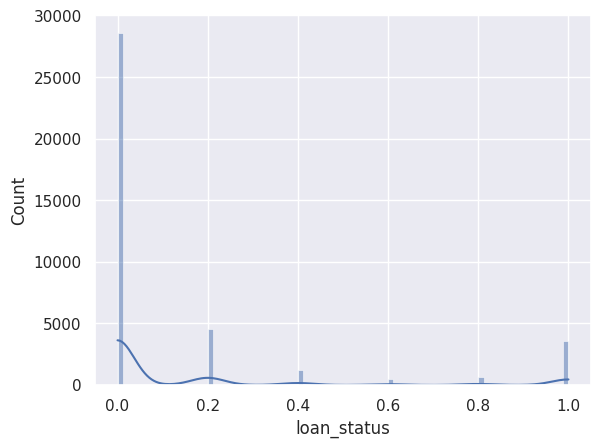

In [9]:
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="darkgrid")
sns.histplot(data=sample, x="loan_status", kde=True);